In [1]:
#This Notebook Written By Tinashe Jamanda 
#Aimed on stats to support argument on the collinearity between inflation, exchange rates and interest rates 


#importing the first sql libary for py withoout math functionality; but credentials adoptions 


import ibm_db

In [2]:
#The database credentials to teh db2 warehouse to access the tables.
#These credentials are only for an instance in the cloud account, that allows one instance per session

dsn_driver = "IBM DB2 ODBC DRIVER"
dsn_database = "BLUDB"

dsn_hostname = "dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net"
dsn_port = "50000"
dsn_protocol = "TCPIP"   

dsn_uid = "bfp69501"
dsn_pwd= "xr2wcxn5tzkdt@lp"


In [3]:
dsn = (
    "DRIVER = {0};"
    "DATABASE = {1};"
    "HOSTNAME = {2};"
    "PORT= {3};"
    "PROTOCOL= {4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)


In [4]:
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  bfp69501 on host:  dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net


In [5]:
#NB this API may take a while before it connects an instance to the IBM DB2 free services
#Please run the code multiple times, if you are prompted for with a warning for expired credentials do not hesitate to contact me 



In [6]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)
print(client)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [7]:
#import libraries for math and plots; establish a different ibm API to retrieve and show data contained
import pandas
import numpy
import scipy 
from scipy import stats
import ibm_db_dbi
import matplotlib 
from matplotlib import pyplot as pyplot
%matplotlib inline 

In [8]:
#The code below will now show the data that we are working with; that is stored and structured in tables in DB2

#connection for pandas
pconn = ibm_db_dbi.Connection(conn)
instance1= "select * from CPI" 
instance2 = "select * from ECOINDI"
instance3 = "select * from CRISIS" 
show1 = pandas.read_sql(instance1, pconn)   #this data is now in pandas dataframe 
show2 = pandas.read_sql(instance2, pconn)
show3 = pandas.read_sql(instance3, pconn)

In [9]:

print("Consumer Price Index") 
CPI = show1.drop(["Consumer_Price_Index___February_2019_100_", "Column_2", "Column_3", "Column_4", "Column_5", "Column_6","Column_7", "Column_8", "Column_9", "Column_10", "Column_11", "Column_12", "Column_13"], axis = 1)
CPI.columns=['CPI_mt', 'Prd_All_Items' , 'Inflation_Rate_Percent_Monthly', 'Inflation_Rate_Percent_Annual']
CPi= CPI.replace('None', '').astype(str)
CPi.head(5)


Consumer Price Index


,CPI_mt,Prd_All_Items,Inflation_Rate_Percent_Monthly,Inflation_Rate_Percent_Annual
0,None,None,None,None
1,None,All Items,Inflation Rate (%) Monthly,Inflation Rate (%) Annual
2,None,100,None,None
3,None,None,None,None
4,2009,"56,2",None,None


In [10]:

print("Macro-economic Indicators")
show2= show2.replace('None', '').astype(str)
show2.columns=['Indicator', '2009' , '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
show2.head(8)

Macro-economic Indicators


,Indicator,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None
5,REAL SECTOR,None,None,None,None,None,None,None,None,None,None
6,Real GDP at 2012 Market prices (US$' m),10 735,12 847,"14 670,00","17 114,80","17 455,30","17 870,20","18 188,30","18 325,80","19 187,80",None
7,Nominal GDP at Market (US$'m up to 2016),9 666,12 042,"14 101,80","17 114,80","19 091,00","19 495,50","19 963,10","20 548,70","22 813,00",None


In [11]:
#Do not drop all countries before comparison we might nedd the data 
#juy = range(969)
#show4= show3.drop(index=juy, axis= 0)

print("Global economic crisis")
show4 = show3.drop(["inflation_crises", "case", "banking_crisis", "currency_crises", "domestic_debt_in_default", "sovereign_external_debt_default", "gdp_weighted_default","independence"], axis = 1)
show4= show4.replace('None', '').astype(str)
show4.head(5)
#refined global economic crisis data



Global economic crisis


,cc3,country,year,systemic_crisis,exch_usd,inflation_annual_cpi
0,DZA,Algeria,1870,1,0.052264,3.441455696
1,DZA,Algeria,1871,0,0.052798,14.14913958
2,DZA,Algeria,1872,0,0.052274,-3.718592965
3,DZA,Algeria,1873,0,0.05168,11.20389701
4,DZA,Algeria,1874,0,0.051308,-3.848560701


In [110]:
print("Consumer Price Index")

df_CPi = CPi.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

df_CPi = df_CPi.replace("None", "").astype(str)

df_CPi['CPI_mt'] = pandas.to_numeric(df_CPi['CPI_mt'], errors='coerce')

df_CPi['Prd_All_Items'] = pandas.to_numeric(df_CPi['Prd_All_Items'], errors='coerce')

df_CPi['Inflation_Rate_Percent_Monthly'] = pandas.to_numeric(df_CPi['Inflation_Rate_Percent_Monthly'], errors='coerce')

df_CPi['Inflation_Rate_Percent_Annual'] = pandas.to_numeric(df_CPi['Inflation_Rate_Percent_Annual'], errors= 'coerce')

df_CPi.dtypes

Consumer Price Index


CPI_mt                            float64
Prd_All_Items                     float64
Inflation_Rate_Percent_Monthly    float64
Inflation_Rate_Percent_Annual     float64
dtype: object

In [111]:
print("Macro Economic Indicator")

show2.dtypes


Macro Economic Indicator


Indicator    object
2009         object
2010         object
2011         object
2012         object
2013         object
2014         object
2015         object
2016         object
2017         object
2018         object
dtype: object

In [112]:
print("Global Crisis Data")

show4['exch_usd'] = pandas.to_numeric(show4['exch_usd'], errors='coerce')

show4['inflation_annual_cpi'] = pandas.to_numeric(show4['inflation_annual_cpi'], errors='coerce')

show4['year'] = pandas.to_datetime(show4['year'], errors='coerce')

show4['exch_usd']= show4['exch_usd'].astype(int)

show4['inflation_annual_cpi']= show4['inflation_annual_cpi'].astype(int)


show4.dtypes

Global Crisis Data


cc3                             object
country                         object
year                    datetime64[ns]
systemic_crisis                 object
exch_usd                         int64
inflation_annual_cpi             int64
dtype: object

In [114]:

#global stats on exchange rates and inflation
print("Global Stats for ExchaneRates and Annual Inflation Consumer Price Index")
show4.describe()


Global Stats for ExchaneRates and Annual Inflation Consumer Price Index


,exch_usd,inflation_annual_cpi
count,1059.000000,1.059000e+03
mean,42.815864,2.084851e+04
std,111.443235,6.757274e+05
min,0.000000,-2.800000e+01
25%,0.000000,2.000000e+00
50%,0.000000,5.000000e+00
75%,8.000000,1.100000e+01
max,744.000000,2.198970e+07


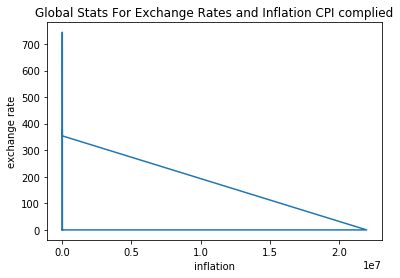

In [115]:
#showing the negative collinearityy between exchane rate and inflation globally


inflation = show4.inflation_annual_cpi

exRate = show4.exch_usd

pyplot.plot(inflation, exRate)

pyplot.title("Global Stats For Exchange Rates and Inflation CPI complied")

pyplot.xlabel("inflation")

pyplot.ylabel("exchange rate")

pyplot.show()

In [118]:

#Moving On
#LIST OF USEFUL INDICATORS FOR ANALYSIS 
Indicators=['GDP per capita', 'Export growth (%)', 'Import growth (%)', 'Trade Balance (US$M)', 'POPULATION (millions)']

ecoIndi= pandas.DataFrame(show2, columns = ['Indicator', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], index=[9, 27, 28, 87])

ecoIndi

,Indicator,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
9,GDP per capita,"790,3","976,1","1 131,80","1 310,40","1 428,00","1 428,00","1 431,70","1 440,80","1 510,80",None
27,Export growth (%),"-0,90%","107,10%","40,40%","-11,80%","-4,00%","-3,50%","-2,90%","2,40%","18,00%","11,70%"
28,Import growth (%),"22,20%","87,80%","46,70%","-11,30%","1,40%","-7,00%","-4,10%","-13,70%","5,80%","28,50%"
87,POPULATION (millions),"12,2","12,3","12,5","13,1","13,4","13,7","13,9","14,3","14,6","14,9"


In [119]:
#descriptions of these values
ecoIndi.describe()




,Indicator,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,4,4,4,4,4,4,4,4,4,4,4
unique,4,4,4,4,4,4,4,4,4,4,4
top,Export growth (%),"22,20%","12,3","40,40%","-11,30%","1 428,00","-7,00%","-4,10%","-13,70%","14,6",None
freq,1,1,1,1,1,1,1,1,1,1,1


In [121]:
#Consumer price Index set
CPi


,CPI_mt,Prd_All_Items,Inflation_Rate_Percent_Monthly,Inflation_Rate_Percent_Annual
0,None,None,None,None
1,None,All Items,Inflation Rate (%) Monthly,Inflation Rate (%) Annual
2,None,100,None,None
3,None,None,None,None
4,2009,"56,2",None,None
5,2010,"57,9",None,"3,1"
6,2011,60,None,"3,5"
7,2012,"62,2",None,"3,7"
8,2013,"63,2",None,"1,6"
9,2014,"63,1",None,"-0,2"


In [122]:

CPi.describe()  #not useful

,CPI_mt,Prd_All_Items,Inflation_Rate_Percent_Monthly,Inflation_Rate_Percent_Annual
count,152,152,152,152
unique,25,66,35,74
top,None,None,None,None
freq,16,14,26,28


In [123]:
#Import magic sql environment to view tables for plots for a taste

!pip install ipython-sql

%load_ext sql

%sql ibm_db_sa://bfp69501:xr2wcxn5tzkdt%40lp@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to Tinashe's Db2: ", dsn_database, "As user: ", dsn_uid, "on Host: ", dsn_hostname)

except:
    print ("Unable to connect, Logon Instance can not exceed 5! Try Again a bit later/ Read Error and contact Tinashe for Help :)", ibm_db.conn_errormsg() )
  



The sql extension is already loaded. To reload it, use:
  %reload_ext sql
Unable to connect, Logon Instance can not exceed 5! Try Again a bit later/ Read Error and contact Tinashe for Help :) [IBM][CLI Driver] SQL0438N  Application raised error or warning with diagnostic text: "Exceeded maximum limit of 5 connections. Connection refused".  SQLSTATE=42502 SQLCODE=-438


In [124]:
#show the data in economic indicator table  using magic SQL

gk= %sql  SELECT * FROM ECOINDI

gk

 * ibm_db_sa://bfp69501:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


Indicator,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
None,None,None,None,None,None,None,None,None,None,None
None,None,None,None,None,None,None,None,None,None,None
None,None,None,None,None,None,None,None,None,None,None
None,None,None,None,None,None,None,None,None,None,None
None,None,None,None,None,None,None,None,None,None,None
REAL SECTOR,None,None,None,None,None,None,None,None,None,None
Real GDP at 2012 Market prices (US$' m),10 735,12 847,"14 670,00","17 114,80","17 455,30","17 870,20","18 188,30","18 325,80","19 187,80",None
Nominal GDP at Market (US$'m up to 2016),9 666,12 042,"14 101,80","17 114,80","19 091,00","19 495,50","19 963,10","20 548,70","22 813,00",None
GDP at Market Prices % changes,"5,4","19,7","14,2","16,7",2,"2,4","1,8","0,8","4,7",None
GDP per capita,"790,3","976,1","1 131,80","1 310,40","1 428,00","1 428,00","1 431,70","1 440,80","1 510,80",None
